In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Palladium.csv")

In [3]:
df.head()

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,1/1/2018
1,1066.5,1096.0,1099.0,1066.0,1/2/2018
2,1095.5,1088.0,1097.0,1084.0,1/3/2018
3,1086.5,1102.5,1108.5,1083.5,1/4/2018
4,1100.0,1091.5,1103.0,1086.5,1/5/2018


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

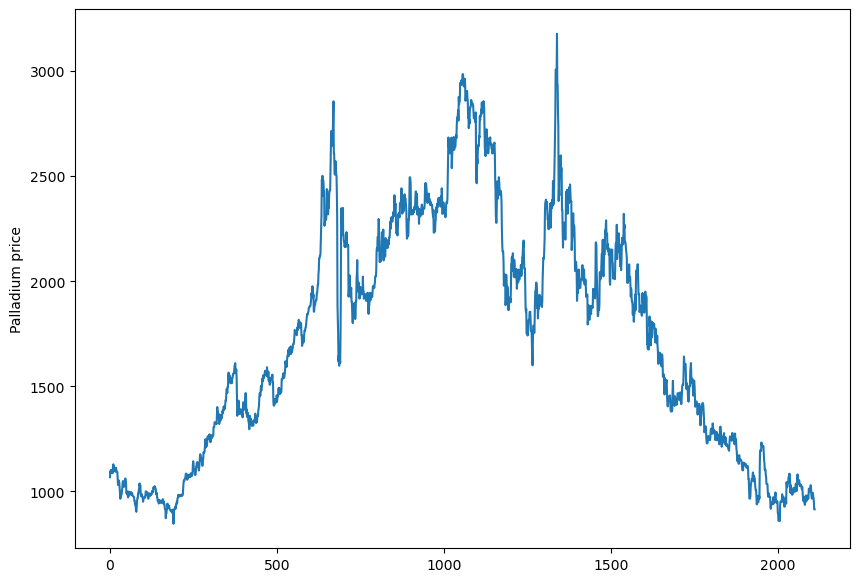

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Palladium price")
plt.show()


In [6]:
t = .6
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  1.427556307407354
c:  905.7357224526843


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,2713.022008
1,2714.449564
2,2715.877120
3,2717.304677
4,2718.732233
...,...
839,3910.741750
840,3912.169306
841,3913.596862
842,3915.024418


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 135.99631178913236
Mean Squared Error (MSE): 3634899.0307203163
Root Mean Squared Error (RMSE): 1906.5411169760584


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[3917.87953108 3919.30708739 3920.7346437  3922.1622     3923.58975631
 3925.01731262 3926.44486893 3927.87242523 3929.29998154 3930.72753785
 3932.15509416 3933.58265046 3935.01020677 3936.43776308 3937.86531939
 3939.29287569 3940.720432   3942.14798831 3943.57554462 3945.00310092
 3946.43065723 3947.85821354 3949.28576985 3950.71332615 3952.14088246
 3953.56843877 3954.99599507 3956.42355138 3957.85110769 3959.278664
 3960.7062203  3962.13377661 3963.56133292 3964.98888923 3966.41644553
 3967.84400184 3969.27155815 3970.69911446 3972.12667076 3973.55422707
 3974.98178338 3976.40933969 3977.83689599 3979.2644523  3980.69200861
 3982.11956492 3983.54712122 3984.97467753 3986.40223384 3987.82979015
 3989.25734645 3990.68490276 3992.11245907 3993.54001537 3994.96757168
 3996.39512799 3997.8226843  3999.2502406  4000.67779691 4002.10535322
 4003.53290953 4004.96046583 4006.38802214 4007.81557845 4009.24313476
 4010.67069106 4012.09824737 401

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

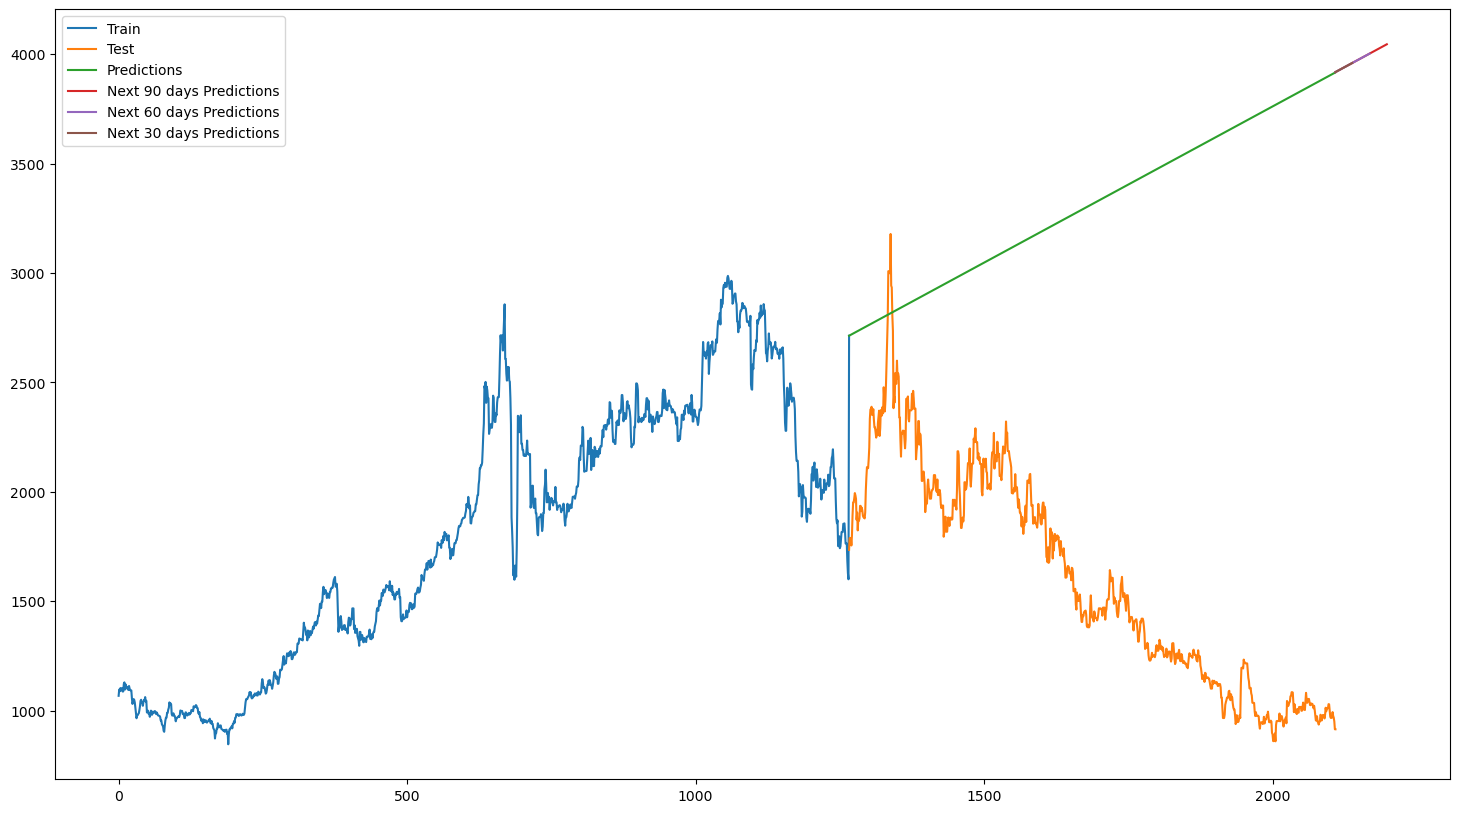

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()